# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [28]:
# student 1:Gil 3621
# student 2:Neta 3366
# student 3:Shay 3613

## Part 2 - Initial Preparations 

In [29]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import f1_score, make_scorer
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors  import KNeighborsClassifier
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score,classification_report




**Loading the datasets**


In [30]:
# Load the train and test datasets
train_data = pd.read_csv('wine_train.csv')
test_data = pd.read_csv('wine_test.csv')

# Define the target and features
X_train = train_data.drop(columns=['target'])
y_train = train_data['target']

X_test = test_data.drop(columns=['target'])
y_test = test_data['target']


**Display the first 5 rows of each dataset**

In [31]:
print("Train dataset sample:")
train_data.head()

Train dataset sample:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,12.08,1.83,2.32,18.5,81.0,1.60,1.50,0.52,1.64,2.40,1.08,2.27,480.0,1
1,13.58,2.58,2.69,24.5,105.0,1.55,0.84,0.39,1.54,8.66,0.74,1.80,750.0,2
2,12.37,0.94,1.36,10.6,88.0,1.98,0.57,0.28,0.42,1.95,1.05,1.82,520.0,1
3,11.82,1.72,1.88,19.5,86.0,2.50,1.64,0.37,1.42,2.06,0.94,2.44,415.0,1
4,13.16,3.57,2.15,21.0,102.0,1.50,0.55,0.43,1.30,4.00,0.60,1.68,830.0,2


In [32]:
print("Test dataset sample:")
test_data.head()

Test dataset sample:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
0,13.78,2.76,2.30,22.0,90.0,1.35,0.68,0.41,1.03,9.58,0.70,1.68,615.0,2
1,14.02,1.68,2.21,16.0,96.0,2.65,2.33,0.26,1.98,4.70,1.04,3.59,1035.0,0
2,13.17,5.19,2.32,22.0,93.0,1.74,0.63,0.61,1.55,7.90,0.60,1.48,725.0,2
3,11.03,1.51,2.20,21.5,85.0,2.46,2.17,0.52,2.01,1.90,1.71,2.87,407.0,1
4,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0,2


EDA

In [33]:
# Statistical summary of the data
print("Statistical summary of the train dataset:")
train_data.describe()


Statistical summary of the train dataset:


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,target
count,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000,142.000000
mean,12.997254,2.297746,2.361690,19.419718,99.943662,2.315986,2.063592,0.346690,1.561901,5.030211,0.958563,2.638873,742.457746,0.922535
std,0.789931,1.093317,0.283231,3.354815,13.683751,0.639469,1.005302,0.117562,0.540979,2.239593,0.219631,0.718083,317.250905,0.772524
min,11.410000,0.740000,1.360000,10.600000,78.000000,0.980000,0.340000,0.130000,0.420000,1.280000,0.480000,1.290000,278.000000,0.000000
25%,12.370000,1.592500,2.222500,17.250000,88.000000,1.782500,1.257500,0.260000,1.250000,3.180000,0.800000,1.922500,500.000000,0.000000
50%,13.050000,1.865000,2.360000,19.250000,98.000000,2.380000,2.155000,0.320000,1.505000,4.800000,0.960000,2.815000,660.000000,1.000000
75%,13.637500,3.020000,2.557500,21.375000,108.000000,2.822500,2.887500,0.430000,1.870000,6.182500,1.120000,3.197500,957.500000,2.000000
max,14.750000,5.650000,3.230000,30.000000,151.000000,3.880000,5.080000,0.630000,3.580000,11.750000,1.450000,4.000000,1680.000000,2.000000


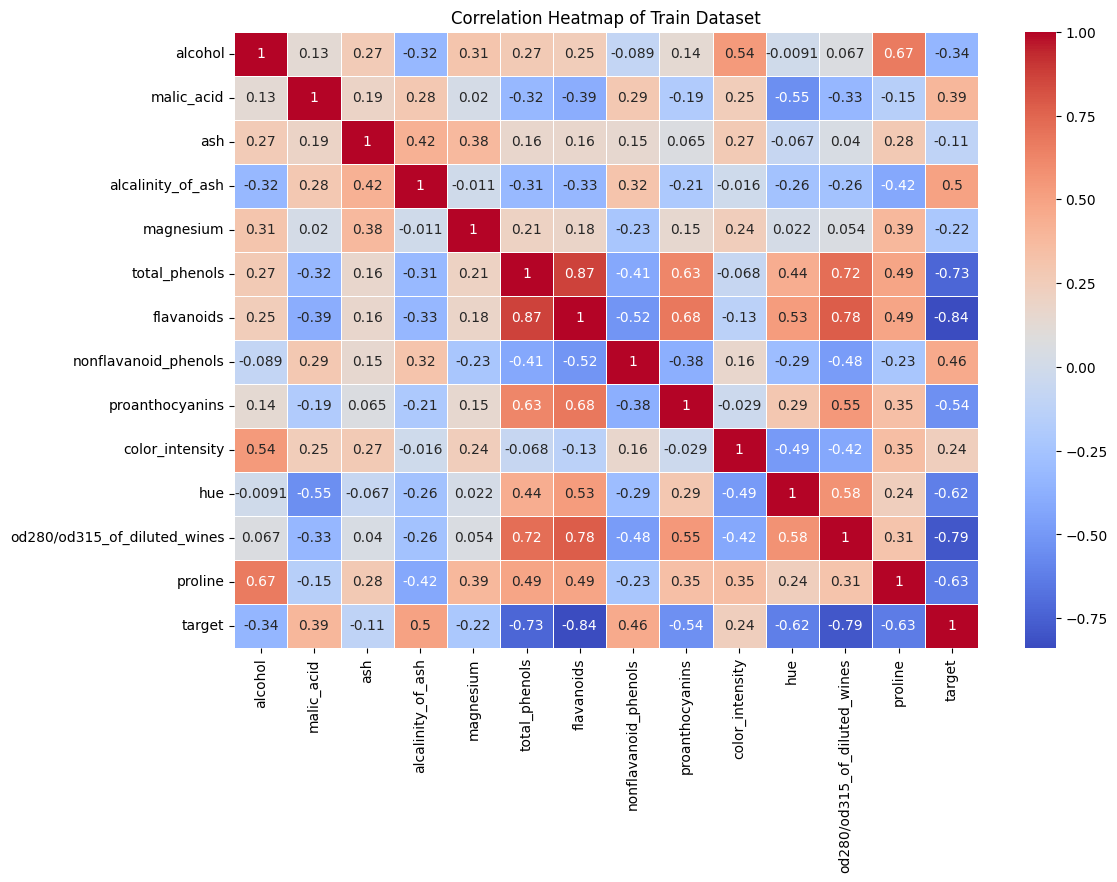

In [34]:
# Visualization 1: Correlation heatmap to show relationships between features
plt.figure(figsize=(12, 8))
sns.heatmap(train_data.corr(), annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Train Dataset")
plt.show()

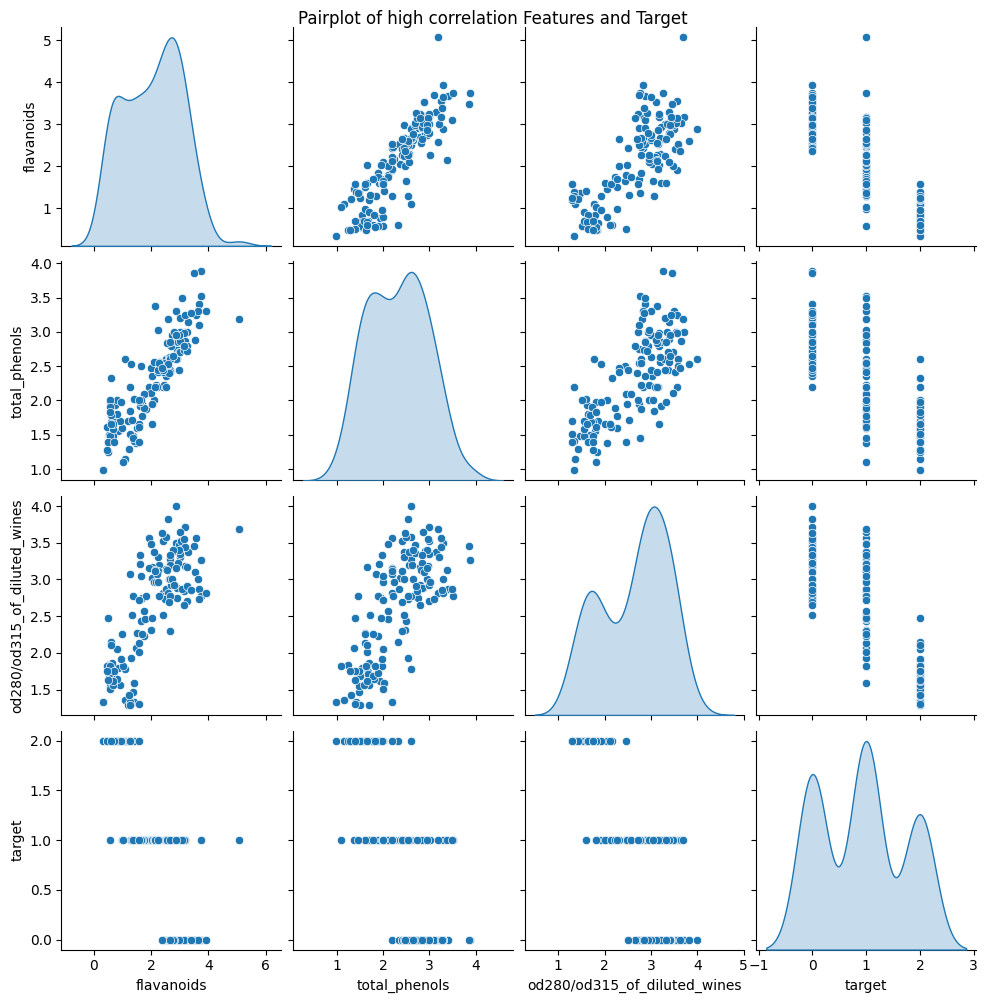

In [35]:
# Visualization 2: Pairplot to visualize distributions and relationships between a few features and the target
sns.pairplot(train_data[['flavanoids', 'total_phenols', 'od280/od315_of_diluted_wines', 'target']], diag_kind='kde')
plt.suptitle("Pairplot of high correlation Features and Target",y=1)

plt.show()

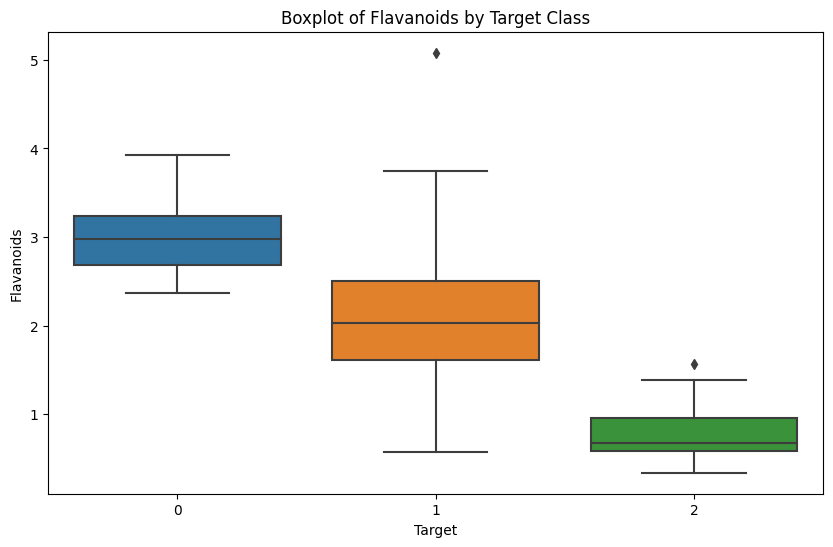

In [36]:
# EDA for the 'flavanoids' feature and 'target' variable
plt.figure(figsize=(10, 6))

# Boxplot to show the distribution of flavanoids across the target classes
sns.boxplot(x='target', y='flavanoids', data=train_data)
plt.title("Boxplot of Flavanoids by Target Class")
plt.xlabel("Target")
plt.ylabel("Flavanoids")
plt.show()

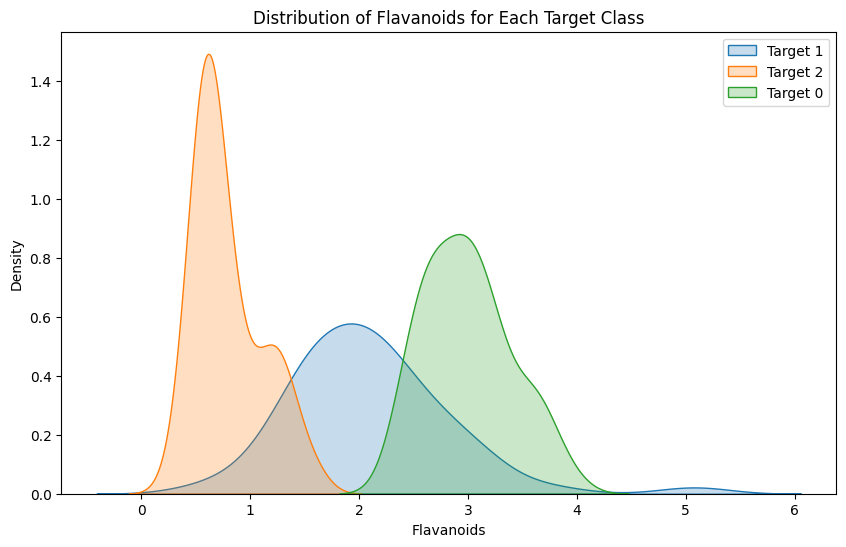

In [42]:
# KDE Plot to visualize the distribution of flavanoids across different target classes
plt.figure(figsize=(10, 6))

for target_class in train_data['target'].unique():
    sns.kdeplot(train_data[train_data['target'] == target_class]['flavanoids'], label=f"Target {target_class}", fill=True)

plt.title("Distribution of Flavanoids for Each Target Class")
plt.xlabel("Flavanoids")
plt.ylabel("Density")
plt.legend()
plt.show()

## Part 3 - Experiments
You could add as many code cells as needed

**Managing the experiments with cross-validation and grid search**

In [38]:
# Define models and parameter grids for hyperparameter tuning
models = {
    'DecisionTree': Pipeline([
        ('model', DecisionTreeClassifier())
    ]),
    'DecisionTree With MinMaxScaler': Pipeline([
        ('scaler', MinMaxScaler()), 
        ('model', DecisionTreeClassifier())
    ]),
    'DecisionTree With StandardScaler': Pipeline([
        ('scaler', StandardScaler()), 
        ('model', DecisionTreeClassifier())
    ]),

    'KNN': Pipeline([
            ('model', KNeighborsClassifier())
    ]),
    'KNN With MinMaxScaler': Pipeline([
        ('scaler', MinMaxScaler()), 
        ('model', KNeighborsClassifier())
    ]),
    'KNN With StandardScaler': Pipeline([
        ('scaler', StandardScaler()), 
        ('model', KNeighborsClassifier())
    ]),


}

# Define parameter grids (prefixed with 'model__' for pipeline)
decisionTreeParams = {
    'model__max_depth': [None, 10, 20, 30],
    'model__min_samples_split': [2, 5, 10]
}

knnParams = {
    'model__n_neighbors': [3, 5, 7, 9],
    'model__weights': ['uniform', 'distance'],
    'model__metric': ['euclidean', 'manhattan']
}

param_grids = {
    'DecisionTree': decisionTreeParams,
    'DecisionTree With MinMaxScaler': decisionTreeParams,
    'DecisionTree With StandardScaler':decisionTreeParams,

    'KNN': knnParams,
    'KNN With MinMaxScaler': knnParams,
    'KNN With StandardScaler': knnParams,
}

# Scorer for evaluating performance based on macro-average F1 score
f1_scorer = make_scorer(f1_score, average='macro')

best_models = {}
best_params = {}
best_scores = {}

grid_results_dfs = []

for model_name, best_model in models.items():
    grid_search = GridSearchCV(best_model, param_grids[model_name], cv=5, scoring=f1_scorer)
    grid_search.fit(X_train, y_train)
    
    # Store the best model, best parameters, and best score separately

    
    grid_results_dfs.append(pd.DataFrame({
        'Method':model_name,
        'model':type(grid_search.best_estimator_.named_steps['model']).__name__,
        'Macro-Average F1': grid_search.best_score_,
        'Best k': grid_search.best_params_.get('model__n_neighbors'),
        'Best Metric': grid_search.best_params_.get('model__metric'),
        'Best Weight': grid_search.best_params_.get('model__weights'),
        'Max Depth': grid_search.best_params_.get('model__max_depth'),
        'Min Samples Split': grid_search.best_params_.get('model__min_samples_split', None)}, index=[0]))

# Display a summary table of results
summary_data = pd.concat(grid_results_dfs, ignore_index=True)

best_idx = summary_data['Macro-Average F1'].idxmax()
best_model_name = summary_data.loc[best_idx, 'Method']
print(f'The model with the best f1 score is `{best_model_name}')
summary_data


The model with the best f1 score is `KNN With MinMaxScaler


,Method,model,Macro-Average F1,Best k,Best Metric,Best Weight,Max Depth,Min Samples Split
0,DecisionTree,DecisionTreeClassifier,0.892399,None,None,None,20,10
1,DecisionTree With MinMaxScaler,DecisionTreeClassifier,0.885398,None,None,None,30,5
2,DecisionTree With StandardScaler,DecisionTreeClassifier,0.891006,None,None,None,30,2
3,KNN,KNeighborsClassifier,0.744289,9,manhattan,distance,None,None
4,KNN With MinMaxScaler,KNeighborsClassifier,0.972619,7,manhattan,uniform,None,None
5,KNN With StandardScaler,KNeighborsClassifier,0.971727,9,manhattan,uniform,None,None


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [39]:
best_model = models[best_model_name]
def fit_and_perdict_best_model(X_train,y_train):
    best_model.fit(X_train,y_train)
    return best_model.predict(X_test)

y_pred = fit_and_perdict_best_model(X_train,y_train)

result = pd.DataFrame({
    'Predictions':y_pred,
    'Real Targets':y_test
})
result


,Predictions,Real Targets
0,2,2
1,0,0
2,2,2
3,1,1
4,2,2
5,1,1
6,0,0
7,1,1
8,0,1
9,1,1


## Part 5 - Apply on test and show model performance estimation

In [27]:

accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f"Best Model Name is: {best_model_name}")
print(f"Accuracy: {accuracy:.4f}")
report
print("First 5 Predictions:")
result.head(5)


Best Model Name is: KNN With MinMaxScaler
Accuracy: 0.9444
First 5 Predictions:


,Predictions,Real Targets
0,2,2
1,0,0
2,2,2
3,1,1
4,2,2
